In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [3]:
data = pd.read_csv('tamilnadu_crops_dataset.csv')
data.head(5)

,Crop,Latitude,Longitude,Season,Year
0,Rice,8.550317,81.450919,Kharif,2021
1,Maize,12.430166,81.099423,Whole Year,2010
2,Groundnut,11.494926,77.431580,Rabi,2007
3,Groundnut,12.148457,80.392494,Rabi,2001
4,Rice,11.586866,80.651516,Kharif,2024


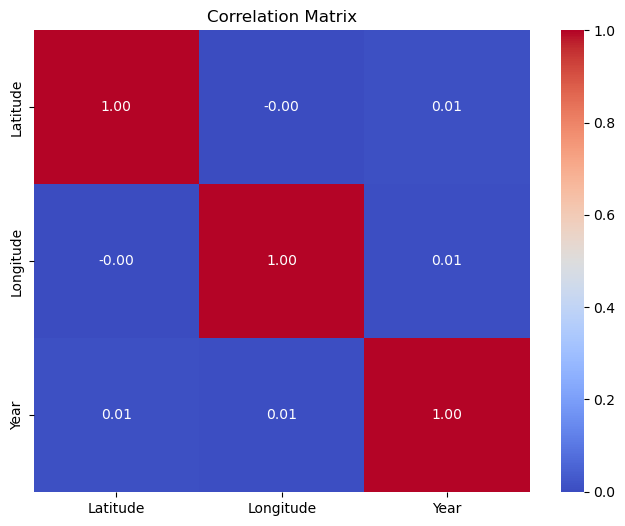

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = data.select_dtypes(include=["number"])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [7]:
data= pd.DataFrame(data)

In [9]:
X = data.drop('Crop', axis=1)
y = data['Crop']

# Define categorical and numerical columns
categorical_columns = ['Season']
numerical_columns = ['Latitude', 'Longitude', 'Year']

# Preprocessing pipeline
ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_columns),  # Scale numerical columns
        ('cat', ohe, categorical_columns)   # One-hot encode categorical columns
    ]
)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [13]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Latitude', 'Longitude',
                                                   'Year']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Season'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [15]:
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.25
Classification Report:
              precision    recall  f1-score   support

      Cotton       0.25      0.25      0.25      1007
   Groundnut       0.26      0.25      0.25      1031
       Maize       0.24      0.26      0.25       965
        Rice       0.24      0.23      0.23       997

    accuracy                           0.25      4000
   macro avg       0.25      0.25      0.25      4000
weighted avg       0.25      0.25      0.25      4000



In [17]:
def predict_crop_probability(latitude, longitude, season, year):
    # Prepare the input data
    input_data = pd.DataFrame([[latitude, longitude, season, year]], columns=['Latitude', 'Longitude', 'Season', 'Year'])
    
    # Predict probabilities for all crops
    probabilities = model_pipeline.predict_proba(input_data)
    
    # Get the crop classes (all possible crops in the dataset)
    crop_classes = model_pipeline.classes_
    
    # Create a dictionary of crop names and their predicted probabilities
    crop_probabilities = dict(zip(crop_classes, probabilities[0]))
    
    return crop_probabilities

In [21]:
latitude = 21.586866
longitude = 20.651516
season = 'Kharif'
year = 2024

predicted_probabilities = predict_crop_probability(latitude, longitude, season, year)
print(f"Predicted probabilities for all crops: {predicted_probabilities}")

Predicted probabilities for all crops: {'Cotton': 0.26, 'Groundnut': 0.23, 'Maize': 0.36, 'Rice': 0.15}


In [29]:
import joblib
joblib.dump(model_pipeline, 'pointer_crop_model.pkl')

print("Model and pipeline saved successfully!")

Model and pipeline saved successfully!
